# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions

# Loading the data

In [2]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Data Normalization

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Data Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# SVM with Linear Kernel Model

Coefficients: 
 [[ 2.23274624e-01  9.13037206e-01 -2.30677342e-01  5.07451957e-04
  -6.40796818e-02  5.43820430e-01  1.87268739e-01  1.73373521e-01]]
Intercept: 
 [-0.69201877]
Mean squared error: 0.18
Coefficient of determination: 0.17


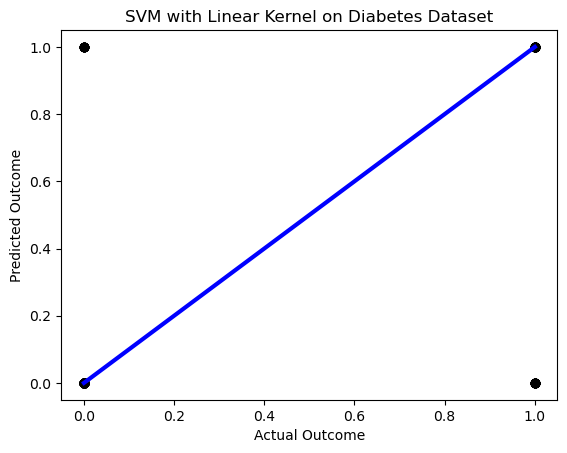

In [5]:
svm_linear = svm.SVC(kernel="linear")
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
print("Coefficients: \n", svm_linear.coef_)
print("Intercept: \n", svm_linear.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# Confusion Matrix of SVM with Linear Kernel on Diabetes Dataset

Confusion matrix: 
 [[98  9]
 [18 29]]


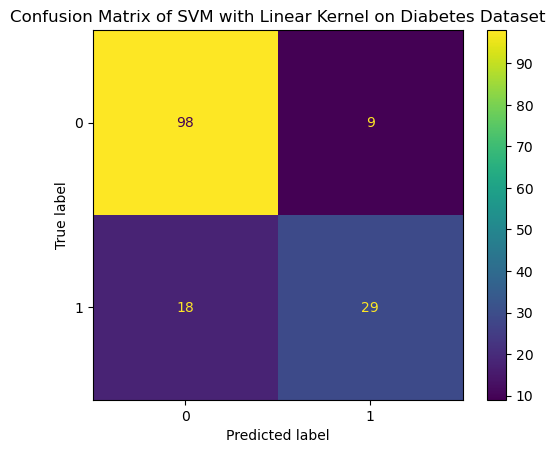

In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# ROC Curve of SVM with Linear Kernel on Diabetes Dataset

ROC AUC: 0.77


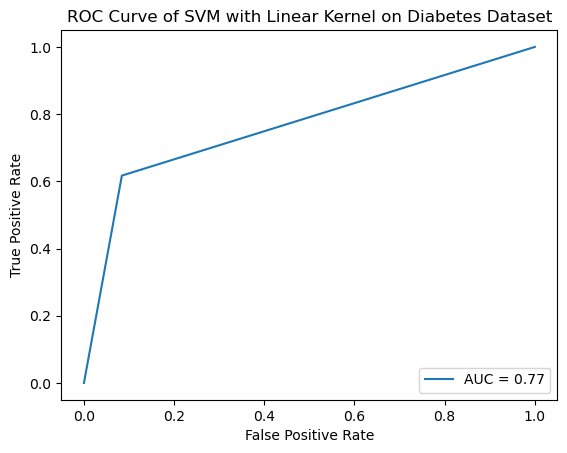

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# SVM with RBF Kernel Model

Mean squared error: 0.21
Coefficient of determination: 0.02


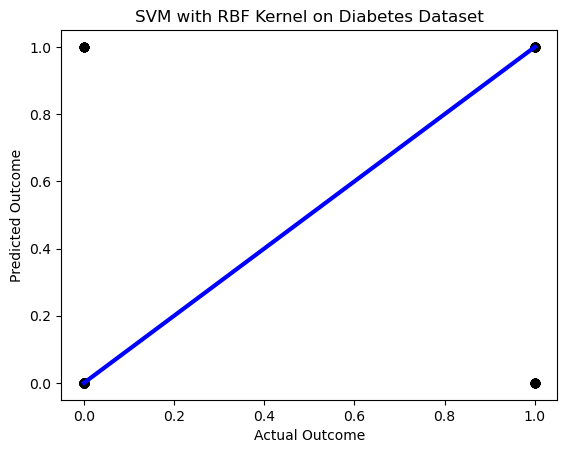

In [8]:
svm_rbf = svm.SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("SVM with RBF Kernel on Diabetes Dataset")
plt.show()

# Confusion Matrix of SVM with RBF Kernel on Diabetes Dataset

Confusion matrix: 
 [[96 11]
 [21 26]]


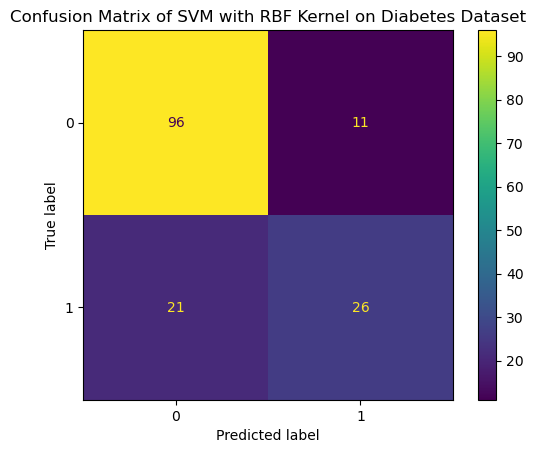

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of SVM with RBF Kernel on Diabetes Dataset")
plt.show()

# ROC Curve of SVM with RBF Kernel on Diabetes Dataset

ROC AUC: 0.73


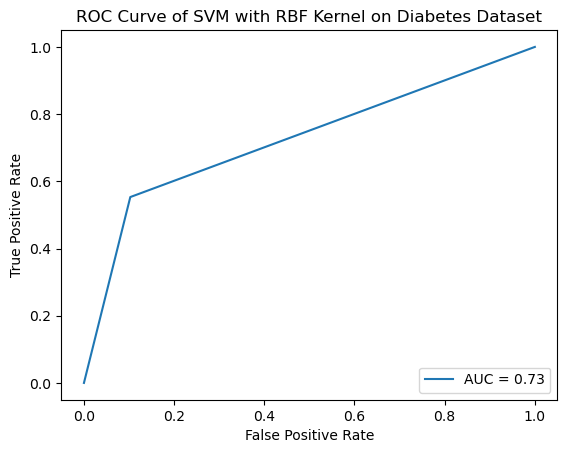

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of SVM with RBF Kernel on Diabetes Dataset")
plt.show()

# Decision Regions for SVM with Linear and RBF Kernels

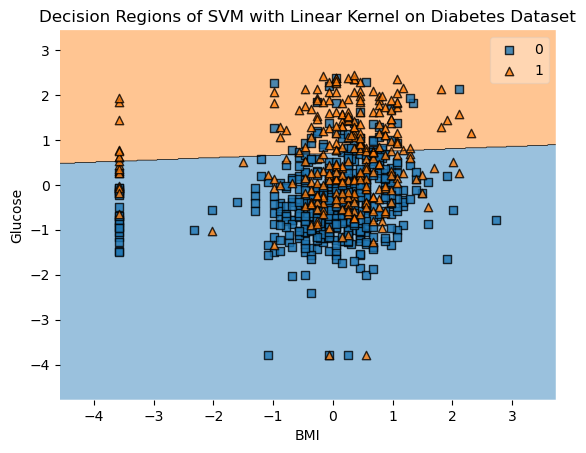

In [11]:
X_vis = X[:, [2, 1]] # BMI and Glucose features
svm_linear.fit(X_vis, y)
plot_decision_regions(X=X_vis, y=y.values, clf=svm_linear)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of SVM with Linear Kernel on Diabetes Dataset")
plt.show()

# Decision Regions of SVM with RBF Kernel on Diabetes Dataset

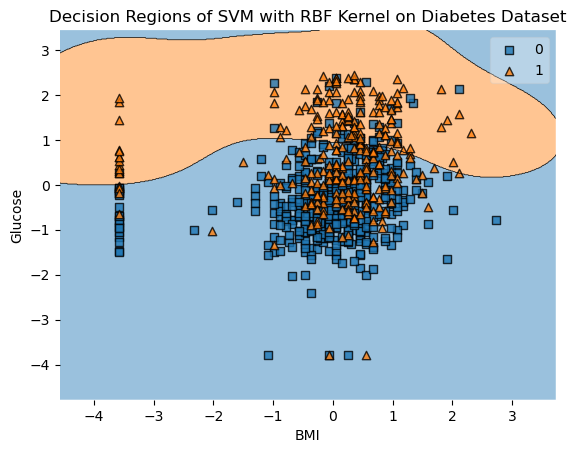

In [12]:
svm_rbf.fit(X_vis, y)
plot_decision_regions(X=X_vis, y=y.values, clf=svm_rbf)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of SVM with RBF Kernel on Diabetes Dataset")
plt.show()

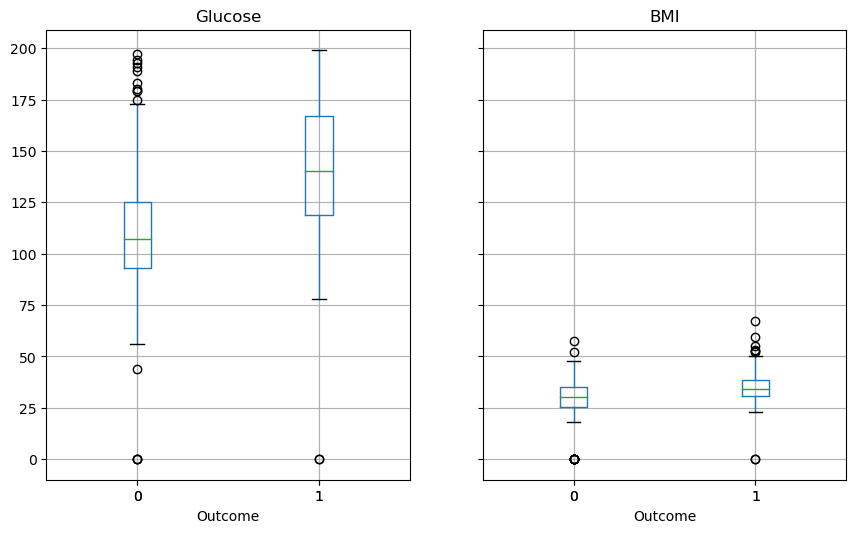

In [13]:
# Adding some tables and figures based on Glucose and BMI
# Table of descriptive statistics for Glucose and BMI by outcome
diabetes.groupby("Outcome")[["Glucose", "BMI"]].describe()
# Figure of boxplots for Glucose and BMI by outcome
diabetes.boxplot(column=["Glucose", "BMI"], by="Outcome", figsize=(10, 6))
plt.suptitle("")
plt.show()

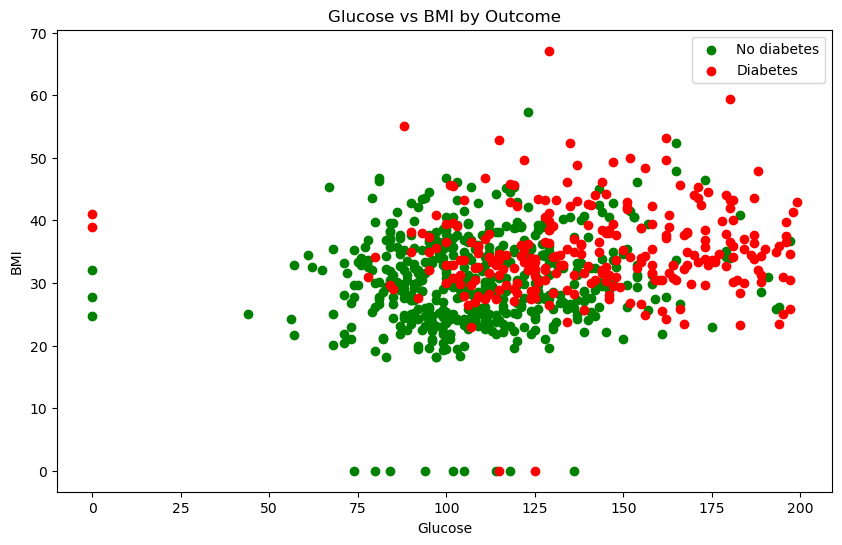

In [14]:
# Figure of scatter plot for Glucose vs BMI by outcome
plt.figure(figsize=(10, 6))
plt.scatter(diabetes[diabetes["Outcome"] == 0]["Glucose"], diabetes[diabetes["Outcome"] == 0]["BMI"], label="No diabetes", color="green")
plt.scatter(diabetes[diabetes["Outcome"] == 1]["Glucose"], diabetes[diabetes["Outcome"] == 1]["BMI"], label="Diabetes", color="red")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.title("Glucose vs BMI by Outcome")
plt.show()